In [10]:
from solver import Span, Beam, Compute
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [2]:
J = (0.3 * 0.5**3)/12 # m4
EJ =  31476*1000000*J/1000 # Mpa * m4 -> N*m2 -> kN*m2

c_1 = Span(lenght = 3.00, ej = EJ)
c_2 = Span(lenght = 4.50, ej = EJ)
c_3 = Span(lenght = 4.00, ej = EJ)
c_4 = Span(lenght = 5.00, ej = EJ)
c_5 = Span(lenght = 6.15, ej = EJ)
c_6 = Span(lenght = 4.00, ej = EJ)

trave = Beam(spans = [c_1, c_2, c_3, c_4, c_5, c_6])

In [3]:
print(f"{trave.spans_lenght() = }")
print(f"{trave.spans_total_lenght() = }")
print(f"{trave.spans_cum_lenght() = }")
print(f"{trave.spans_ej() = }")
print(f"{trave.spans_q_max() = }")
print(f"{trave.spans_q_min() = }")


trave.spans_lenght() = [3.0, 4.5, 4.0, 5.0, 6.15, 4.0]
trave.spans_total_lenght() = 26.65
trave.spans_cum_lenght() = array([ 0.  ,  3.  ,  7.5 , 11.5 , 16.5 , 22.65, 26.65])
trave.spans_ej() = [98362.49999999999, 98362.49999999999, 98362.49999999999, 98362.49999999999, 98362.49999999999, 98362.49999999999]
trave.spans_q_max() = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
trave.spans_q_min() = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [8]:
J = (0.3 * 0.5**3)/12 # m4
EJ =  31476*1000000*J/1000 # Mpa * m4 -> N*m2 -> kN*m2

c_1 = Span(lenght = 3.00, ej = EJ)
c_2 = Span(lenght = 4.50, ej = EJ)
c_3 = Span(lenght = 4.00, ej = EJ)
c_4 = Span(lenght = 5.00, ej = EJ)
c_5 = Span(lenght = 6.15, ej = EJ)
c_6 = Span(lenght = 4.00, ej = EJ)

trave = Beam(spans = [c_1, c_2, c_3, c_4, c_5, c_6], supports='incastre-right')

run = Compute(trave)

a = run.bending_moment_span_Q(1)

In [96]:
x = run.generate_expanded_x_solutions()
r = run.generate_R_solutions()
cum_lenghts = trave.spans_cum_lenght()
nCampate = 6
span_Q = 0
s = sp.Symbol('s')
I = np.identity(nCampate)
m_i = [
                    ((-x[span_Q][n_span] - r[span_Q][n_span] * (s-cum_lenghts[n_span])) - ((I[span_Q,n_span]*(s-cum_lenghts[span_Q])**2)/2)) \
                    * (sp.Heaviside(s-cum_lenghts[n_span]) - sp.Heaviside(s-cum_lenghts[n_span+1])) \
                for n_span in range(nCampate)
            ]

In [54]:
- x[0]

Matrix([
[                   0],
[  -0.491338912574569],
[   0.137796375248564],
[ -0.0328783181600082],
[ 0.00812484517717799],
[-0.00273048075626473],
[ 0.00136524037813237]])

In [55]:
- r[0]

Matrix([
[    1.33622036247514],
[   0.139807841738474],
[ -0.0426686733521432],
[ 0.00820063266743724],
[-0.00176509364771426],
[ 0.00102393028359927]])

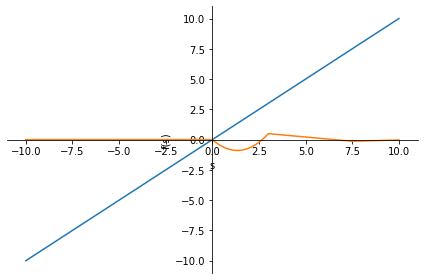

In [82]:
sp.plot(s,-np.sum(m_i,axis=0))

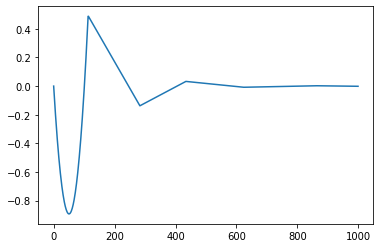

In [97]:
m_i_lambdify = sp.lambdify(s,-np.sum(m_i,axis=0))

s_func = np.linspace(0, 26.5, 1000)

m = m_i_lambdify(s_func)
plt.plot(m)

In [92]:
# np.savetxt('prova.txt',np.array([s_func, m_i_lambdify(s_func)]).transpose())

In [ ]:
x1 = Span(1,2)
x2 = Span(5,6)
x3 = Span(1.5, 7.6)
beam = Beam([x1,x2,x3])

for span in beam.spans: 
    print(span.ej)

print(beam.spans_lenght())
print(beam.spans_ej())
print(beam.spans_q_max())
print(beam.spans_q_min())


2
6
7.6
[1, 5, 1.5]
[2, 6, 7.6]
[0.0, 0.0, 0.0]
[0.0, 0.0, 0.0]


In [103]:
list_of_xy_lists = [[[1,2,3,8],[1,2,4,6]]]
for xy in list_of_xy_lists:
    x,y = xy[0] ,xy[1]
    print(x)
    print(y)

[1, 2, 3, 8]
[1, 2, 4, 6]


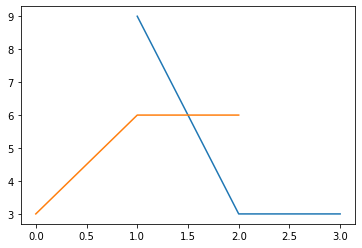

In [140]:

plt.plot([1,2,3], [9,3,3],[3,6,6])

In [122]:
a = [1].append(a)
print(a)

None


In [126]:
print([].extend(["2",3]))

None


In [127]:
a = []

In [128]:
a.append(3)

In [129]:
a

[3]

In [133]:
a.extend([1,2])

In [134]:
a

[3, [1, 2], 1, 2]